In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
classes=['airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

In [ ]:
def display_img(index):
  plt.figure(figsize=(3,3)) #set the size of image
  plt.matshow(x_train[index]) #display the image using matshow
  plt.axis('off') #turn of the axis label
  plt.title(classes[int(y_train[index])]) #set the tittle of the plot to the corresponding class label

<ipython-input-117-1506d620c54c>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[index])])


<Figure size 300x300 with 0 Axes>

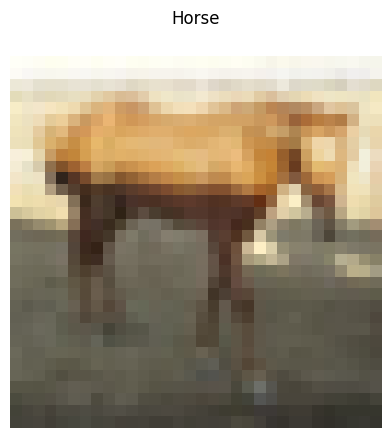

In [ ]:
display_img(2000)

In [ ]:
model=Sequential()
model.add(Conv2D(50,(3,3),input_shape=(32,32,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(100,(3,3),activation='relu',padding='same'))
model.add(Conv2D(150,(3,3),activation='relu',padding='same'))
model.add(Conv2D(200,(3,3),activation='relu',padding='same'))
model.add(Conv2D(250,(3,3),activation='relu',padding='same'))
model.add(Conv2D(300,(3,3),activation='relu',padding='same'))
model.add(Conv2D(350,(3,3),activation='relu',padding='same'))


model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
#scc is a loss function used in categorical classification task,particular where the target
#bse is measure the diff bet prediction and actual binary

In [ ]:
training_history=model.fit(x_train,y_train,batch_size=1000,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 824ms/step - accuracy: 0.0872 - loss: 9.4311 - val_accuracy: 0.1747 - val_loss: 2.8217
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 564ms/step - accuracy: 0.1805 - loss: 2.7068 - val_accuracy: 0.2121 - val_loss: 2.3757
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 573ms/step - accuracy: 0.2472 - loss: 2.2126 - val_accuracy: 0.3405 - val_loss: 1.7567
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 572ms/step - accuracy: 0.3763 - loss: 1.6818 - val_accuracy: 0.4298 - val_loss: 1.5437
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 600ms/step - accuracy: 0.4598 - loss: 1.4730 - val_accuracy: 0.5010 - val_loss: 1.3786
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 599ms/step - accuracy: 0.5195 - loss: 1.3260 - val_accuracy: 0.5379 - val_loss: 1.2666
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 583ms/step - accuracy: 0.5529 - loss: 1.2398 - val_accuracy: 0.5765 - val_loss: 1.1833
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 605ms/step - accuracy: 0.6082 - loss: 1.0965 - val_accu

In [ ]:
hist=training_history.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0, 0.5, 'loss')

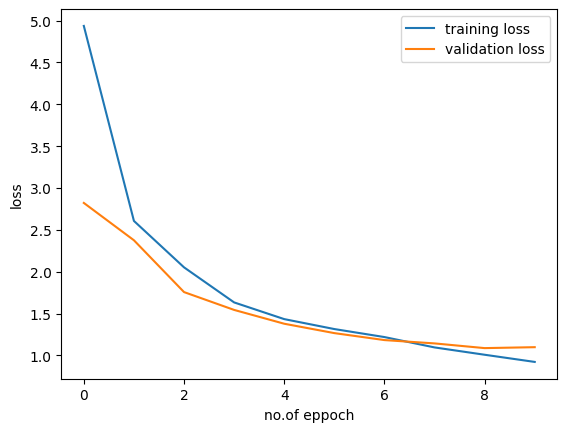

In [ ]:
plt.plot(hist['loss'],label='training loss')
plt.plot(hist['val_loss'],label='validation loss')
plt.legend()
plt.xlabel('no.of eppoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

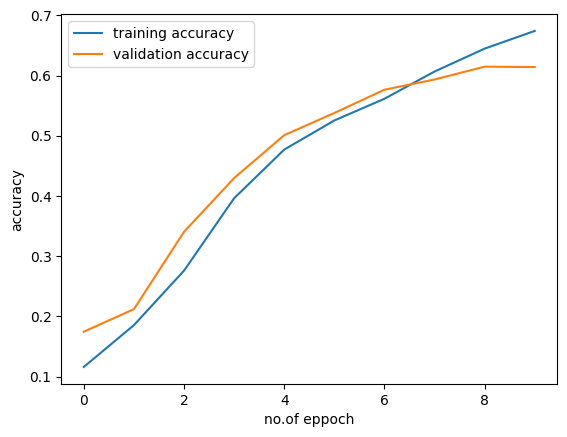

In [ ]:
plt.plot(hist['accuracy'],label='training accuracy')
plt.plot(hist['val_accuracy'],label='validation accuracy')
plt.legend()
plt.xlabel('no.of eppoch')
plt.ylabel('accuracy')

In [ ]:
def predict(index):
  plt.imshow(x_test[index]) # to display the image from the test dataset at the specified index
  predict_img=x_test[index].reshape(1,32,32,3)
  predict_prob=model.predict(predict_img)
  predict_class=np.argmax(predict_prob)  # provided by the Numpy,return the index of the maximum value in the array
  print('true label',classes[int(y_test[index])])
  print('predicted label',classes[predict_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
true label Dog
predicted label Dog


<ipython-input-125-b730477cf958>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('true label',classes[int(y_test[index])])


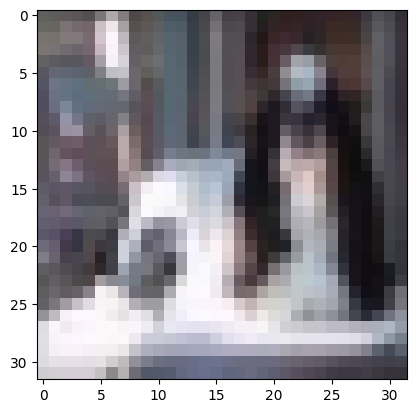

In [ ]:
predict(9993)